In [1]:
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomTranslation, RandomRotation,RandomBrightness, RandomContrast, RandomZoom
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.resnet_v2 import preprocess_input

2024-04-09 11:32:59.301757: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-09 11:32:59.376727: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 11:33:00.482878: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
num_classes = 100

In [3]:
def preprocessing(image, label):
    image = tf.image.resize(image, (224, 224))
    label = tf.squeeze(tf.one_hot(label, depth = num_classes), axis = 0)
    return  image, label

augmentation_donnees_keras = Sequential([
    RandomFlip("horizontal"),
    RandomTranslation(0.2,0.2),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),
    RandomBrightness(0.2,value_range=(0,1))
])

def augmentation_donnees(image, label):
  return augmentation_donnees_keras(image/255.0, training = True)*255.0, label

def preprocess_resnet(image, label):
    return preprocess_input(image), label

train_dataset, _ = cifar100.load_data()

train_dataset = tf.data.Dataset.from_tensor_slices(train_dataset)

2024-04-09 11:33:01.470205: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1163 MB memory:  -> device: 0, name: NVIDIA A2, pci bus id: 0000:b1:00.0, compute capability: 8.6


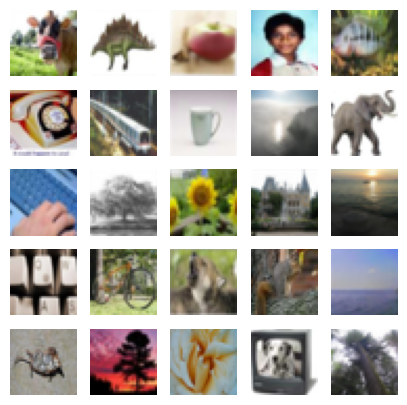

2024-04-09 11:33:04.663756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node sequential_1/random_contrast_1/add/_28}}]] [type.googleapis.com/tensorflow.DerivedStatus='']
2024-04-09 11:33:04.663807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node sequential_1/random_contrast_1/add/_28}}]]
	 [[sequential_1/random_brightness_1/add/_25]] [type.googleapis.com/tensorflow.DerivedStatus='']
2024-04-09 11:33:04.663849: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10132709017104000704
2024-04-09 11:33:04.663867: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2492861917275128997
2024-04-09 11:33:04.663878: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6

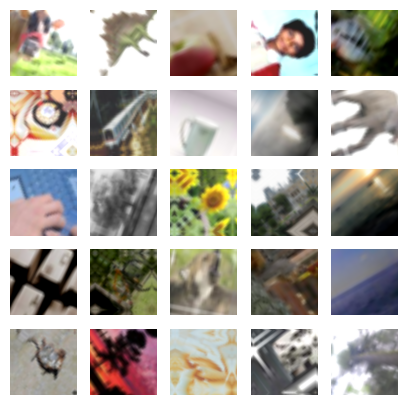

In [4]:
def afficher_batch(images):
    plt.figure(figsize=(5, 5))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i]/255.0, cmap='gray')
        plt.axis('off')
    plt.show()

afficher_batch(next(iter(train_dataset.batch(25)))[0].numpy())
afficher_batch(next(iter(train_dataset.map(preprocessing).map(augmentation_donnees).batch(25)))[0].numpy())

I0000 00:00:1712662389.558598  102686 service.cc:145] XLA service 0x7f5138001410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712662389.558650  102686 service.cc:153]   StreamExecutor device (0): NVIDIA A2, Compute Capability 8.6
2024-04-09 11:33:09.685055: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-09 11:33:10.218377: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900
I0000 00:00:1712662397.179331  102686 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


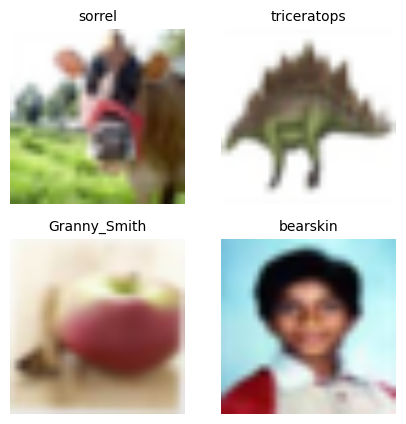

In [5]:
resnet = ResNet50V2(weights='imagenet')
iter_img = iter(train_dataset.map(preprocessing))
iter_resnet = iter(train_dataset.map(preprocessing).map(preprocess_resnet))

plt.figure(figsize=(5, 5))
for i in range(4):
    img = next(iter_img)[0].numpy()
    img_resnet = np.expand_dims(next(iter_resnet)[0].numpy(), axis = 0)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(img/255.0, cmap='gray')
    ax.title.set_text(decode_predictions(resnet.predict(img_resnet, verbose = 0), top=1)[0][0][1])
    ax.title.set_fontsize(10)
    plt.axis('off')
plt.show()